# AIM:
### My aim is to help a new person who is planning to move to Toronto. Trying to find best place to live with low crime and rent is under X dollars for 2 Bedroom and 1 Bathroom. Also Trying to find out an area which best for his Dog care business.

## Data
### To achieve this I have to have 3 data
#### i) Rental Data: https://raw.githubusercontent.com/naveakht/Coursera_Capstone/master/Toronto_apartment_rentals_2018.csv
#### ii) Crime Data: https://raw.githubusercontent.com/naveakht/Coursera_Capstone/master/Homicide.csv
#### iii) DogShop data from FourSquare

## Importing library

In [123]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
#import folium # map rendering library

print('Libraries imported.')

import time

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    folium-0.5.0               |             py_0          45 KB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    altair-4.0.1               |             py_0         575 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.0 MB

The following NEW packages will be 

## Finding the crimes in each Neighbourhood

In [4]:
#crime_data=pd.read_csv('https://raw.githubusercontent.com/naveakht/Coursera_Capstone/master/Homicide.csv',header=1,error_bad_lines=False)

df=pd.read_csv('https://raw.githubusercontent.com/naveakht/Coursera_Capstone/master/Homicide.csv')

crimedata=df[['Occurrence_year','Homicide_Type','Neighbourhood','Lat','Long']]



In [5]:
crimedata.head()

,Occurrence_year,Homicide_Type,Neighbourhood,Lat,Long
0,2004,Other,Rosedale-Moore Park (98),43.685028,-79.392853
1,2004,Shooting,Woburn (137),43.781536,-79.234962
2,2004,Shooting,Malvern (132),43.810860,-79.206894
3,2004,Shooting,Dovercourt-Wallace Emerson-Junction (93),43.670475,-79.434403
4,2004,Shooting,Rouge (131),43.823543,-79.203865


In [6]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="naveakht_user")

In [7]:
#I ran this code 1 time and store the file in https://raw.githubusercontent.com/naveakht/Coursera_Capstone/master/Toronto_CrimedataWithPostcode.csv
#So that i dont need to run this code again. Commenting it now.
#for lindex,lLat,lLong in zip(crimedata.index,crimedata['Lat'],crimedata['Long']):
#    try:
#        location = geolocator.reverse((lLat, lLong))
#        add=location.raw
#        print(location.raw)
#        lpostcode=add['address']['postcode']
#        crimedata.loc[lindex,'postcode'] = lpostcode
#    except:
#        lpostcode='NOTAVAIL'
#        crimedata.loc[lindex,'postcode'] = lpostcode
#    time.sleep(0.2)

#crimedata.head()

In [8]:
#Cordinates of toronto Main city

Postcode_Cordinate={}
Postcode_Cordinate['TorontoCity']={}
Postcode_Cordinate['TorontoCity']['Lat'] = 43.653908
Postcode_Cordinate['TorontoCity']['Long'] = -79.384293

print(Postcode_Cordinate)

{'TorontoCity': {'Lat': 43.653908, 'Long': -79.384293}}


In [9]:
#Fetch the file again so that i can get Postcode.
crimedata=pd.read_csv('https://raw.githubusercontent.com/naveakht/Coursera_Capstone/master/Toronto_CrimedataWithPostcode.csv')

#Find postcode NOTAVAIL and remove the row.
crimedata_postcode = crimedata.iloc[np.where(crimedata['postcode'] != 'NOTAVAIL')]

crimedata_postcode['ShortCode'] = crimedata_postcode['postcode'].str[:3]

crimedata_postcode.set_index('ShortCode',inplace=True)

print(crimedata_postcode.shape)

crimedata_postcode.head()

#Taking values only after 2004
crimedata_2009=crimedata_postcode.loc[crimedata_postcode['Occurrence_year']>2008]

crimedata_postcode=crimedata_2009
crimedata_postcode.head()

(907, 7)


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Index,Occurrence_year,Homicide_Type,Neighbourhood,Lat,Long,postcode
ShortCode,,,,,,,
M3L,48,2010,Other,Glenfield-Jane Heights (25),43.739391,-79.513222,M3L 2E8
M6H,101,2012,Shooting,Dufferin Grove (83),43.654278,-79.437302,M6H 1N4
M2N,102,2012,Shooting,Lansing-Westgate (38),43.757469,-79.425423,M2N 1N1
M2N,103,2012,Shooting,Lansing-Westgate (38),43.757469,-79.425423,M2N 1N1
M1T,104,2012,Other,L'Amoreaux (117),43.784492,-79.315231,M1T 1P7


In [10]:
#Group by Occurrence_year and Homicide_Type and count the crimes
CrimeTrend_df= crimedata_postcode.groupby(by=['Occurrence_year','Homicide_Type']).count()

#Create a bar graph to see if the crime is increasing.
CrimeTrend_df.reset_index(inplace=True)
CrimeTrend_df.head()

,Occurrence_year,Homicide_Type,Index,Neighbourhood,Lat,Long,postcode
0,2009,Other,9,9,9,9,9
1,2009,Shooting,32,32,32,32,32
2,2009,Stabbing,11,11,11,11,11
3,2010,Other,16,16,16,16,16
4,2010,Shooting,30,30,30,30,30


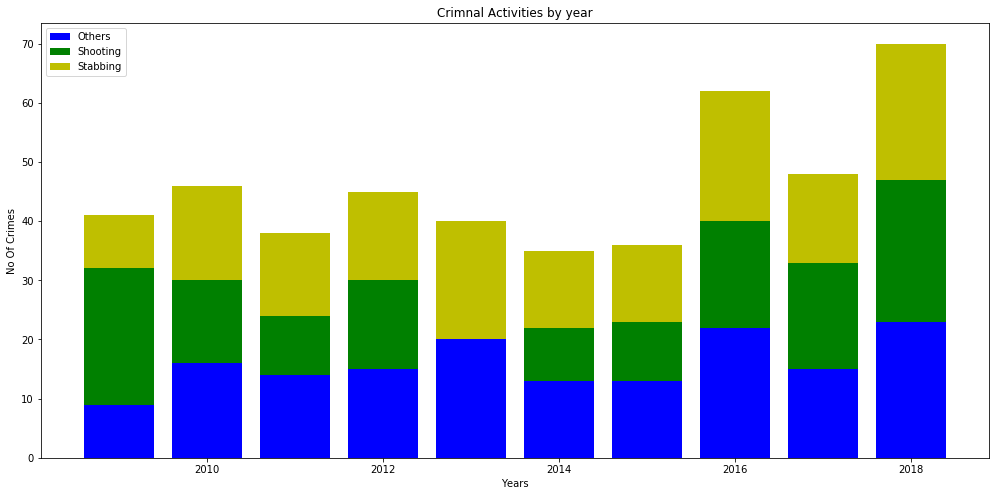

In [128]:
import matplotlib.pyplot as plt

y_other=CrimeTrend_df.loc[CrimeTrend_df['Homicide_Type']=='Other']
p_other=plt.bar(y_other['Occurrence_year'],y_other['Index'],color='b')

y_Shooting=CrimeTrend_df.iloc[np.where(CrimeTrend_df['Homicide_Type']=='Shooting')]
p_Shooting=plt.bar(y_other['Occurrence_year'],y_Shooting['Index'],color='g',bottom=y_other['Index'])

y_Stabbing=CrimeTrend_df.iloc[np.where(CrimeTrend_df['Homicide_Type']=='Stabbing')]
p_Stabbing=plt.bar(y_other['Occurrence_year'],y_other['Index'],color='y',bottom=y_Shooting['Index'])

plt.xlabel('Years')
plt.ylabel('No Of Crimes')
plt.title('Crimnal Activities by year')
plt.legend((p_other[0], p_Shooting[0],p_Stabbing[0]), ('Others', 'Shooting','Stabbing'))

plt.show()


## Find total number of crimes per ShortCode

In [13]:
crimedata_postcode.head()

,Index,Occurrence_year,Homicide_Type,Neighbourhood,Lat,Long,postcode
ShortCode,,,,,,,
M3L,48,2010,Other,Glenfield-Jane Heights (25),43.739391,-79.513222,M3L 2E8
M6H,101,2012,Shooting,Dufferin Grove (83),43.654278,-79.437302,M6H 1N4
M2N,102,2012,Shooting,Lansing-Westgate (38),43.757469,-79.425423,M2N 1N1
M2N,103,2012,Shooting,Lansing-Westgate (38),43.757469,-79.425423,M2N 1N1
M1T,104,2012,Other,L'Amoreaux (117),43.784492,-79.315231,M1T 1P7


In [14]:
crimedata_postcode.reset_index(inplace=True)

In [15]:
ShortCodeCrime=crimedata_postcode.groupby(by=crimedata_postcode['ShortCode']).count()
ShortCodeCrime_df=ShortCodeCrime[['Index']]
ShortCodeCrime_df.rename(columns={'Index':'NumberOfCrime'},inplace=True)
ShortCodeCrime_df.head()
print(ShortCodeCrime_df.shape)
#ShortCodeCrime_df.sort_values(by='NumberOfCrime',inplace=True)

(81, 1)


/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [127]:
ShortCodeCrime_df.head()

,NumberOfCrime
Shortpostcode,
L3R,2
M1B,21
M1C,5
M1E,10
M1G,5


# Finding Rental for 2BedRoom and 1 badroom near Toronto

In [16]:
rental_df=pd.read_csv('https://raw.githubusercontent.com/naveakht/Coursera_Capstone/master/Toronto_apartment_rentals_2018.csv')

In [18]:
#Defining number of bathroom and bedroom
MIN_BEDROOM=1
MIN_BATHROOM=1
MAX_RENT = 1700
MAX_CRIME= 10
BUSINESS_TYPE='Dog'
rental_df.head()

,Bedroom,Bathroom,Den,Address,Lat,Long,Price
0,2,2.0,0,"3985 Grand Park Drive, 3985 Grand Park Dr, Mis...",43.581639,-79.648193,"$2,450.00"
1,1,1.0,1,"361 Front St W, Toronto, ON M5V 3R5, Canada",43.643051,-79.391643,"$2,150.00"
2,1,1.0,0,"89 McGill Street, Toronto, ON, M5B 0B1",43.660605,-79.378635,"$1,950.00"
3,2,2.0,0,"10 York Street, Toronto, ON, M5J 0E1",43.641087,-79.381405,"$2,900.00"
4,1,1.0,0,"80 St Patrick St, Toronto, ON M5T 2X6, Canada",43.652487,-79.389622,"$1,800.00"


In [126]:
feature_rental_df=rental_df.loc[(rental_df['Bedroom']>=MIN_BEDROOM) & (rental_df['Bathroom']>=MIN_BATHROOM) & rental_df['Address'].str.contains('Toronto'),['Lat','Long','Price','Address','Bedroom','Bathroom']]

#Bathroom + Bedroom
feature_rental_df['TotalRoom'] = feature_rental_df['Bedroom'] + feature_rental_df['Bathroom']
feature_rental_df['Price']=feature_rental_df['Price'].str[1:-3]
feature_rental_df['Price']=feature_rental_df['Price'].apply(lambda x: float(x.replace(',', '')))
feature_rental_df['PriceFor2Room'] = (feature_rental_df['Price']/feature_rental_df['TotalRoom'])*(lBathroom+lBedRoom)
print(feature_rental_df.shape)

feature_rental_df.reset_index()
feature_rental_df.head()

(788, 8)


,Lat,Long,Price,Address,Bedroom,Bathroom,TotalRoom,PriceFor2Room
1,43.643051,-79.391643,2150.0,"361 Front St W, Toronto, ON M5V 3R5, Canada",1,1.0,2.0,2150.0
2,43.660605,-79.378635,1950.0,"89 McGill Street, Toronto, ON, M5B 0B1",1,1.0,2.0,1950.0
3,43.641087,-79.381405,2900.0,"10 York Street, Toronto, ON, M5J 0E1",2,2.0,4.0,1450.0
4,43.652487,-79.389622,1800.0,"80 St Patrick St, Toronto, ON M5T 2X6, Canada",1,1.0,2.0,1800.0
5,43.634890,-79.434654,1729.0,"87 Jameson Avenue, Toronto, ON, M6K 2W8",1,1.0,2.0,1729.0


## Find Postcode w.r.t Lat and Long

In [20]:
#I hae donne this and save a output in file. So that i dont need to run this again..

feature_rental_df = pd.read_csv('https://raw.githubusercontent.com/naveakht/Coursera_Capstone/master/RentTorontoWithPostcode.csv',sep=';')

#for lindex,lLat,lLong in zip(feature_rental_df.index,feature_rental_df['Lat'],feature_rental_df['Long']):
#    location = geolocator.reverse((lLat, lLong))
#    try:
#        location = geolocator.reverse((lLat, lLong),timeout=1)
#        add=location.raw
#        print(lindex)
#        lpostcode=add['address']['postcode']
#        feature_rental_df.loc[lindex,'Shortpostcode'] = lpostcode[:3]
#    except:
#        lpostcode='NOTAVAIL'
#        feature_rental_df.loc[lindex,'Shortpostcode'] = lpostcode
#    time.sleep(1)
    
#feature_rental_df.head()

In [21]:
feature_rental_df.head()

,Index,Lat,Long,Price,Address,Bedroom,Bathroom,TotalRoom,PriceFor2Room,Shortpostcode
0,1,43.643051,-79.391643,2150.0,361 Front St W,1,1.0,2.0,2150.0,M5V
1,2,43.660605,-79.378635,1950.0,89 McGill Street,1,1.0,2.0,1950.0,M5B
2,3,43.641087,-79.381405,2900.0,10 York Street,2,2.0,4.0,1450.0,M5J
3,4,43.652487,-79.389622,1800.0,80 St Patrick St,1,1.0,2.0,1800.0,M5T
4,5,43.634890,-79.434654,1729.0,87 Jameson Avenue,1,1.0,2.0,1729.0,M6K


In [22]:
#Group by postcode and take the mean of price 

feature_rental_df.loc[feature_rental_df['Shortpostcode']=='M3H']

MeanRentalPrice_df = feature_rental_df.groupby(by='Shortpostcode').mean()[['PriceFor2Room']]

In [23]:
MeanRentalPrice_df.head()

,PriceFor2Room
Shortpostcode,
M1T,1250.000000
M2J,1927.000000
M2N,1500.000000
M2R,1530.833333
M3A,800.000000


In [24]:
#rentalAndCrime_df = pd.concat([ShortCodeCrime_df,feature_rental_df], axis=1)
ShortCodeCrime_df.reset_index(inplace=True)
feature_rental_df.reset_index(inplace=True)

In [25]:
ShortCodeCrime_df.rename(columns={'ShortCode':'Shortpostcode'},inplace=True)

In [26]:
feature_rental_df.head()

,index,Index,Lat,Long,Price,Address,Bedroom,Bathroom,TotalRoom,PriceFor2Room,Shortpostcode
0,0,1,43.643051,-79.391643,2150.0,361 Front St W,1,1.0,2.0,2150.0,M5V
1,1,2,43.660605,-79.378635,1950.0,89 McGill Street,1,1.0,2.0,1950.0,M5B
2,2,3,43.641087,-79.381405,2900.0,10 York Street,2,2.0,4.0,1450.0,M5J
3,3,4,43.652487,-79.389622,1800.0,80 St Patrick St,1,1.0,2.0,1800.0,M5T
4,4,5,43.634890,-79.434654,1729.0,87 Jameson Avenue,1,1.0,2.0,1729.0,M6K


In [27]:
df_Crime_Rental=pd.merge(ShortCodeCrime_df,MeanRentalPrice_df,on='Shortpostcode',how='right')

In [30]:
#So it shows the Price for 2 room and with the crime. 
#Take only the Postcode where the Crime is less than 10 a year
df_Crime_Rental=df_Crime_Rental.loc[df_Crime_Rental['NumberOfCrime']<MAX_CRIME]
df_Crime_Rental=df_Crime_Rental.loc[df_Crime_Rental['PriceFor2Room']<MAX_RENT]
df_Crime_Rental


,Shortpostcode,NumberOfCrime,PriceFor2Room
0,M1T,6.0,1250.000000
3,M3A,2.0,800.000000
5,M3H,3.0,1506.111111
7,M4E,4.0,1300.000000
16,M5G,2.0,1193.333333
23,M6E,7.0,1333.333333
24,M6G,8.0,1164.444444


In [31]:
#Normalise the dataset

from sklearn import preprocessing
df_Crime_Rental[['NumberOfCrime_Norm','PriceFor2Room_Norm']]=df_Crime_Rental[['NumberOfCrime','PriceFor2Room']]
min_max_scaler = preprocessing.MinMaxScaler()
df_Crime_Rental[['NumberOfCrime_Norm','PriceFor2Room_Norm']] = min_max_scaler.fit_transform(df_Crime_Rental[['NumberOfCrime','PriceFor2Room']])
df_Crime_Rental.sort_values(by='PriceFor2Room',inplace=True)

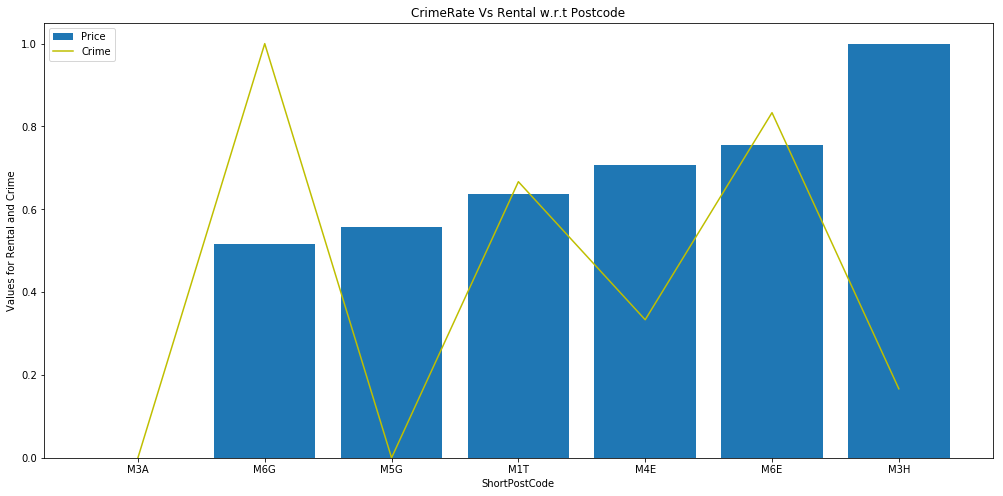

In [50]:
#Make a graph to show a relationship between rent and crime
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 17
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size


price_plt=plt.bar(df_Crime_Rental['Shortpostcode'],df_Crime_Rental['PriceFor2Room_Norm'])
crime_plt=plt.plot(df_Crime_Rental['Shortpostcode'],df_Crime_Rental['NumberOfCrime_Norm'],color='y')

plt.xlabel('ShortPostCode')
plt.ylabel('Values for Rental and Crime')
plt.title('CrimeRate Vs Rental w.r.t Postcode')

plt.legend((price_plt[0],crime_plt[0]),('Price','Crime'))
plt.show()


## It looks like M3A, M3H M5G and M5P are quite good areas to Live with less rental. 

### Now try to find the local stores around above postcode to do the business. Ideally If we have less coffee shop in this area then its good to do business.

In [33]:
Top_Areas=df_Crime_Rental['Shortpostcode'].tolist()

In [34]:
Top_Areas

['M3A', 'M6G', 'M5G', 'M1T', 'M4E', 'M6E', 'M3H']

In [35]:
#Top_Areas = ['M3A', 'M3H', 'M5G','M5P']

In [36]:
ShortCodeCrime_df.set_index('Shortpostcode',inplace=True)
#MeanRentalPrice_df.head()

In [37]:
#Check for Longitude and Latitude for each M3A, M3H M5G and M5P
FeatureDf=pd.DataFrame(columns=['postcode','Lat','Long'])

#Initilising Dic
for i in Top_Areas:
    Postcode_Cordinate[i]={}
    
for i in Top_Areas:
    a = crimedata.loc[crimedata['postcode'].str.startswith(i),['postcode','Lat','Long']]
    a.reset_index(inplace=True)    
    FeatureDf.loc[i] = [i,a.loc[0]['Long'],a.loc[0]['Lat']]
    Postcode_Cordinate[i]['Lat'] = a.loc[0]['Lat']
    Postcode_Cordinate[i]['Long'] = a.loc[0]['Long']
    Postcode_Cordinate[i]['Crime'] = ShortCodeCrime_df.loc[i,'NumberOfCrime']
    Postcode_Cordinate[i]['Rent']  = MeanRentalPrice_df.loc[i,'PriceFor2Room']
                    

FeatureDf

,postcode,Lat,Long
M3A,M3A,-79.325851,43.743374
M6G,M6G,-79.428719,43.669308
M5G,M5G,-79.384895,43.658512
M1T,M1T,-79.315231,43.784492
M4E,M4E,-79.298027,43.678886
M6E,M6E,-79.441109,43.702255
M3H,M3H,-79.440086,43.736111


In [38]:
print(Postcode_Cordinate)

{'TorontoCity': {'Lat': 43.653908, 'Long': -79.384293}, 'M3A': {'Lat': 43.743373999999996, 'Long': -79.325851, 'Crime': 2, 'Rent': 800.0}, 'M6G': {'Lat': 43.669308, 'Long': -79.428719, 'Crime': 8, 'Rent': 1164.4444443333334}, 'M5G': {'Lat': 43.658512, 'Long': -79.384895, 'Crime': 2, 'Rent': 1193.3333333333333}, 'M1T': {'Lat': 43.784492, 'Long': -79.31523100000001, 'Crime': 6, 'Rent': 1250.0}, 'M4E': {'Lat': 43.678886, 'Long': -79.298027, 'Crime': 4, 'Rent': 1300.0}, 'M6E': {'Lat': 43.702255, 'Long': -79.441109, 'Crime': 7, 'Rent': 1333.333333}, 'M3H': {'Lat': 43.736111, 'Long': -79.440086, 'Crime': 3, 'Rent': 1506.1111110000002}}


In [124]:
#Shows these points on Maps.
import folium

m = folium.Map(
    location=[Postcode_Cordinate['TorontoCity']['Lat'], Postcode_Cordinate['TorontoCity']['Long']],
    tiles='Stamen Toner',
    zoom_start=10
)

folium.Circle(
    radius=1000,
    location=[Postcode_Cordinate['TorontoCity']['Lat'], Postcode_Cordinate['TorontoCity']['Long']],
    popup='Toronto Main City',
    color='Blue',
    fill=True
).add_to(m)

for i in Top_Areas:
    folium.Marker(
        location=[Postcode_Cordinate[i]['Lat'], Postcode_Cordinate[i]['Long']],
        popup='Postcode: '+i+' Rent='+str(round(Postcode_Cordinate[i]['Rent']))+ ' Crime = '+str(Postcode_Cordinate[i]['Crime'])
    ).add_to(m)
m

## Finding the coffee shops near Top5 locations using Foursquare API

In [74]:
CLIENT_ID = '--Removed--' # your Foursquare ID
CLIENT_SECRET = '--Removed--' # your Foursquare Secret
VERSION = '20190605' # Foursquare API version


print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: P3TBTCKATTROFAUL4VZSL13OLTC0ADEKZG2HQPWDFQPLTZGV
CLIENT_SECRET:KGXM2ON34TIDWST1Y03HAKIRHLRKHTT2CPJT3TOTW2LYTNIQ


In [75]:
#Create URLs for Foursqare
for i in Top_Areas:
    lLat_lLong = str(Postcode_Cordinate[i]['Lat'])+','+str(Postcode_Cordinate[i]['Long'])
    url = 'https://api.foursquare.com/v2/venues/search?client_id='+CLIENT_ID+'&client_secret='+CLIENT_SECRET+'&v='+VERSION+'&ll='+lLat_lLong+'&query='+BUSINESS_TYPE+'&limit=50'
    print(url)
    results = requests.get(url).json()
    lenn= len(results['response']['venues'])
    print(lenn)
    Postcode_Cordinate[i]['NoOfDogShop'] = lenn

https://api.foursquare.com/v2/venues/search?client_id=P3TBTCKATTROFAUL4VZSL13OLTC0ADEKZG2HQPWDFQPLTZGV&client_secret=KGXM2ON34TIDWST1Y03HAKIRHLRKHTT2CPJT3TOTW2LYTNIQ&v=20190605&ll=43.743373999999996,-79.325851&query=Dog&limit=50
21
https://api.foursquare.com/v2/venues/search?client_id=P3TBTCKATTROFAUL4VZSL13OLTC0ADEKZG2HQPWDFQPLTZGV&client_secret=KGXM2ON34TIDWST1Y03HAKIRHLRKHTT2CPJT3TOTW2LYTNIQ&v=20190605&ll=43.669308,-79.428719&query=Dog&limit=50
43
https://api.foursquare.com/v2/venues/search?client_id=P3TBTCKATTROFAUL4VZSL13OLTC0ADEKZG2HQPWDFQPLTZGV&client_secret=KGXM2ON34TIDWST1Y03HAKIRHLRKHTT2CPJT3TOTW2LYTNIQ&v=20190605&ll=43.658512,-79.384895&query=Dog&limit=50
50
https://api.foursquare.com/v2/venues/search?client_id=P3TBTCKATTROFAUL4VZSL13OLTC0ADEKZG2HQPWDFQPLTZGV&client_secret=KGXM2ON34TIDWST1Y03HAKIRHLRKHTT2CPJT3TOTW2LYTNIQ&v=20190605&ll=43.784492,-79.31523100000001&query=Dog&limit=50
50
https://api.foursquare.com/v2/venues/search?client_id=P3TBTCKATTROFAUL4VZSL13OLTC0ADEKZG2HQ

In [95]:
#So all the Top areas are having more than 50 coffee shops So plot these numbers.
#df_Crime_Rental.drop(columns='index',inplace=True)
#df_Crime_Rental

In [88]:
lDogShop=[]

for i in Top_Areas:
    lDogShop.insert(len(lDogShop),Postcode_Cordinate[i]['NoOfDogShop'])


#df_Crime_Rental.insert(4,"NoOfDogShop",lDogShop)
#df_Crime_Rental.reset_index(inplace=True)


In [139]:
df_Crime_Rental.reset_index(inplace=True)
df_Crime_Rental[['Shortpostcode','NoOfDogShop','NumberOfCrime_Norm','PriceFor2Room_Norm']]

,Shortpostcode,NoOfDogShop,NumberOfCrime_Norm,PriceFor2Room_Norm
0,M3A,0.000000,0.000000,0.000000
1,M6G,0.758621,1.000000,0.516129
2,M5G,1.000000,0.000000,0.557042
3,M1T,1.000000,0.666667,0.637293
4,M4E,0.517241,0.333333,0.708104
5,M6E,1.000000,0.833333,0.755311
6,M3H,0.206897,0.166667,1.000000


In [90]:
min_max_scaler = preprocessing.MinMaxScaler()
df_Crime_Rental[['NoOfDogShop']] = min_max_scaler.fit_transform(df_Crime_Rental[['NoOfDogShop']])

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [140]:
df_Crime_Rental.set_index('Shortpostcode',inplace=True)

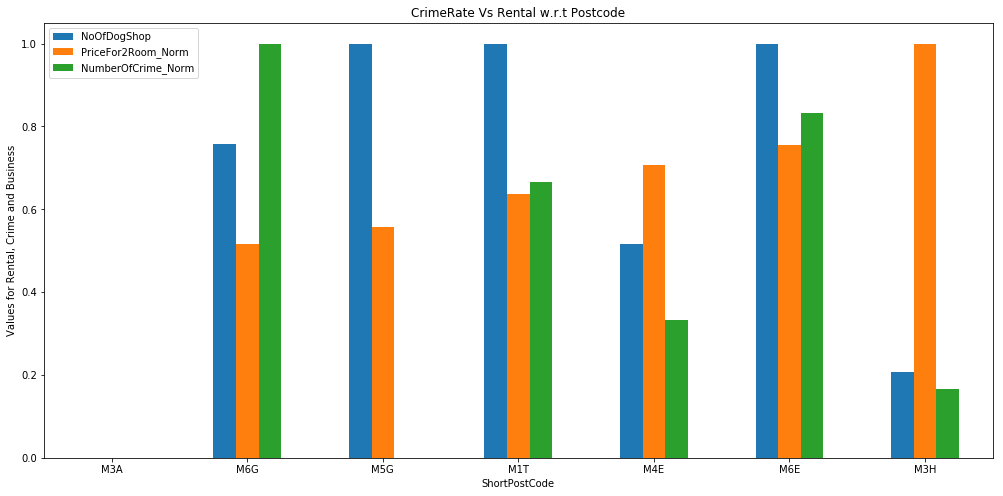

In [141]:
#Make a graph to show a relationship between rent and crime
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 17
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size
df_bar=df_Crime_Rental[['NoOfDogShop','PriceFor2Room_Norm','NumberOfCrime_Norm']]


#price_plt=plt.bar(df_Crime_Rental.index,df_Crime_Rental['PriceFor2Room_Norm'])
price_plt=df_bar.plot.bar(rot=0)
#crime_plt=plt.plot(df_Crime_Rental.index,df_Crime_Rental['NumberOfCrime_Norm'],color='y')
#Dog_plt=plt.bar(df_Crime_Rental.index,df_Crime_Rental['NoOfDogShop'])


plt.xlabel('ShortPostCode')
plt.ylabel('Values for Rental, Crime and Business')
plt.title('CrimeRate Vs Rental w.r.t Postcode')
#plt.xticks(df_Crime_Rental.index)
#plt.legend(price_plt[0],Crime')
plt.show()

# It looks like M3H has low crime with Least Dog shop and also rent is under Budget and also closer to Toronto.